Automatically created module for IPython interactive environment


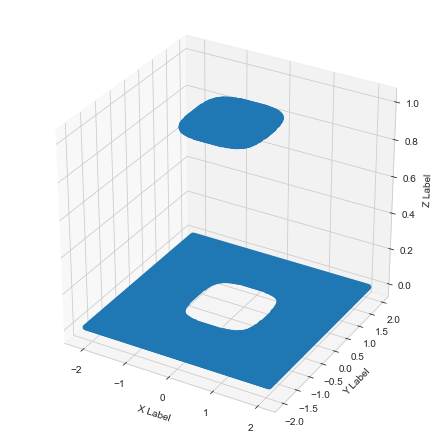

In [37]:
print(__doc__)

import re, seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

# import some data to play with
iris = datasets.load_breast_cancer()
X1 = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y1 = iris.target

# X = X1[:200]
# Y = Y1[:200]

from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(100, factor=.1, noise=.1)

def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
#     return np.dot(np.dot(X, M), Y.T)
    return np.dot(X*X,(Y*Y).T)**4

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
# plt.title('3-Class classification using Support Vector Machine with custom'
#           ' kernel')
# plt.axis('tight')
# plt.show()

ax.scatter(xx, yy, Z, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()